In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
import torchvision.transforms as trns
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import random
import plotly.express as px
import joblib

In [2]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [3]:
Data = pd.read_csv("crop_recommendation.csv")

In [4]:
Data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
Data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
Data.size

17600

In [7]:
Data.shape

(2200, 8)

In [8]:
Data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
print(Data['label'].unique())
print(len(Data['label'].unique()))

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
22


In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


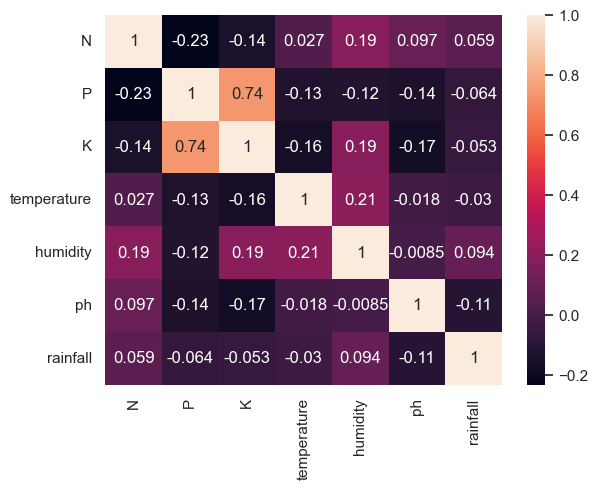

In [41]:
sns.heatmap(Data.iloc[:, :-1].corr(), annot=True)
plt.savefig("./figures/correlation.png", dpi=100)

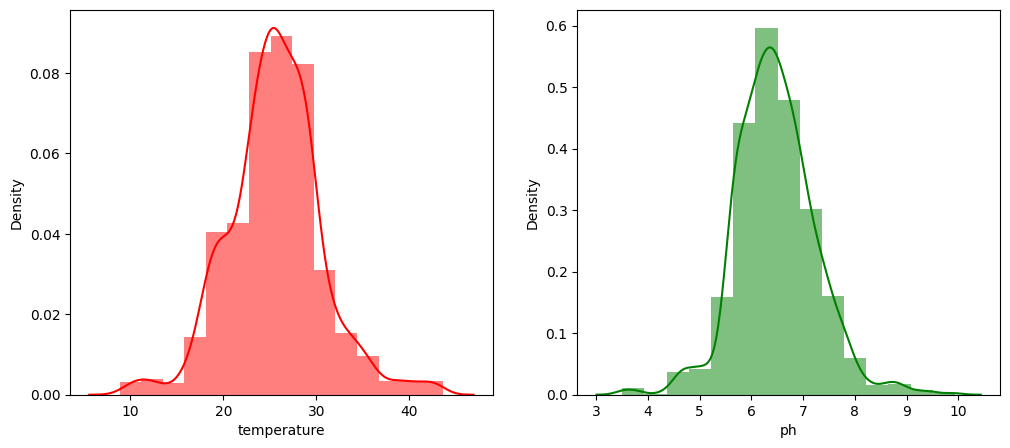

In [32]:
plt.figure(figsize=(12,5), dpi=100)
plt.subplot(1, 2, 1)
sns.distplot(Data['temperature'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 2, 2)
sns.distplot(Data['ph'],color="green",bins=15,hist_kws={'alpha':0.5})
plt.savefig("./figures/temp&ph_density.png")

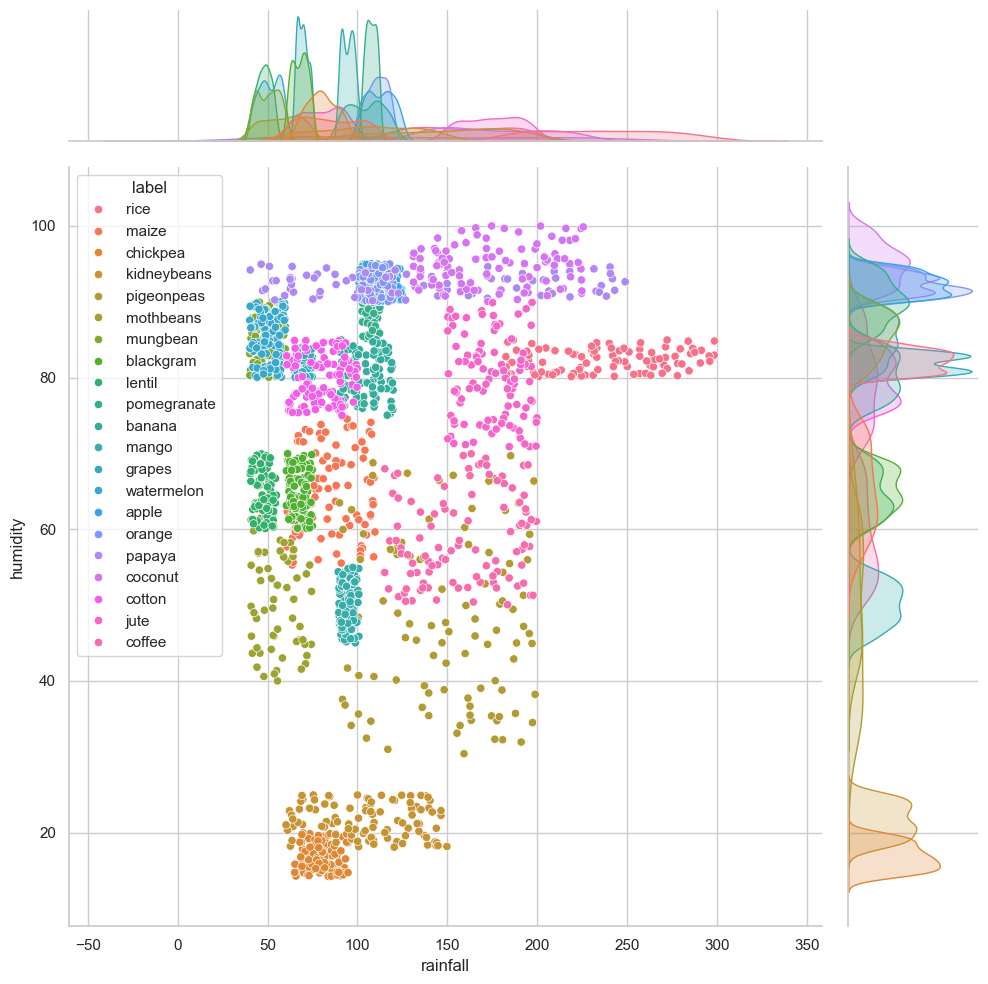

In [39]:
sns.jointplot(x="rainfall",y="humidity",data=Data[(Data['temperature']<40) & 
                                                  (Data['rainfall']>40)],height=10,hue="label")
plt.savefig("./figures/humidity_vs_rainfall.png", dpi= 100)

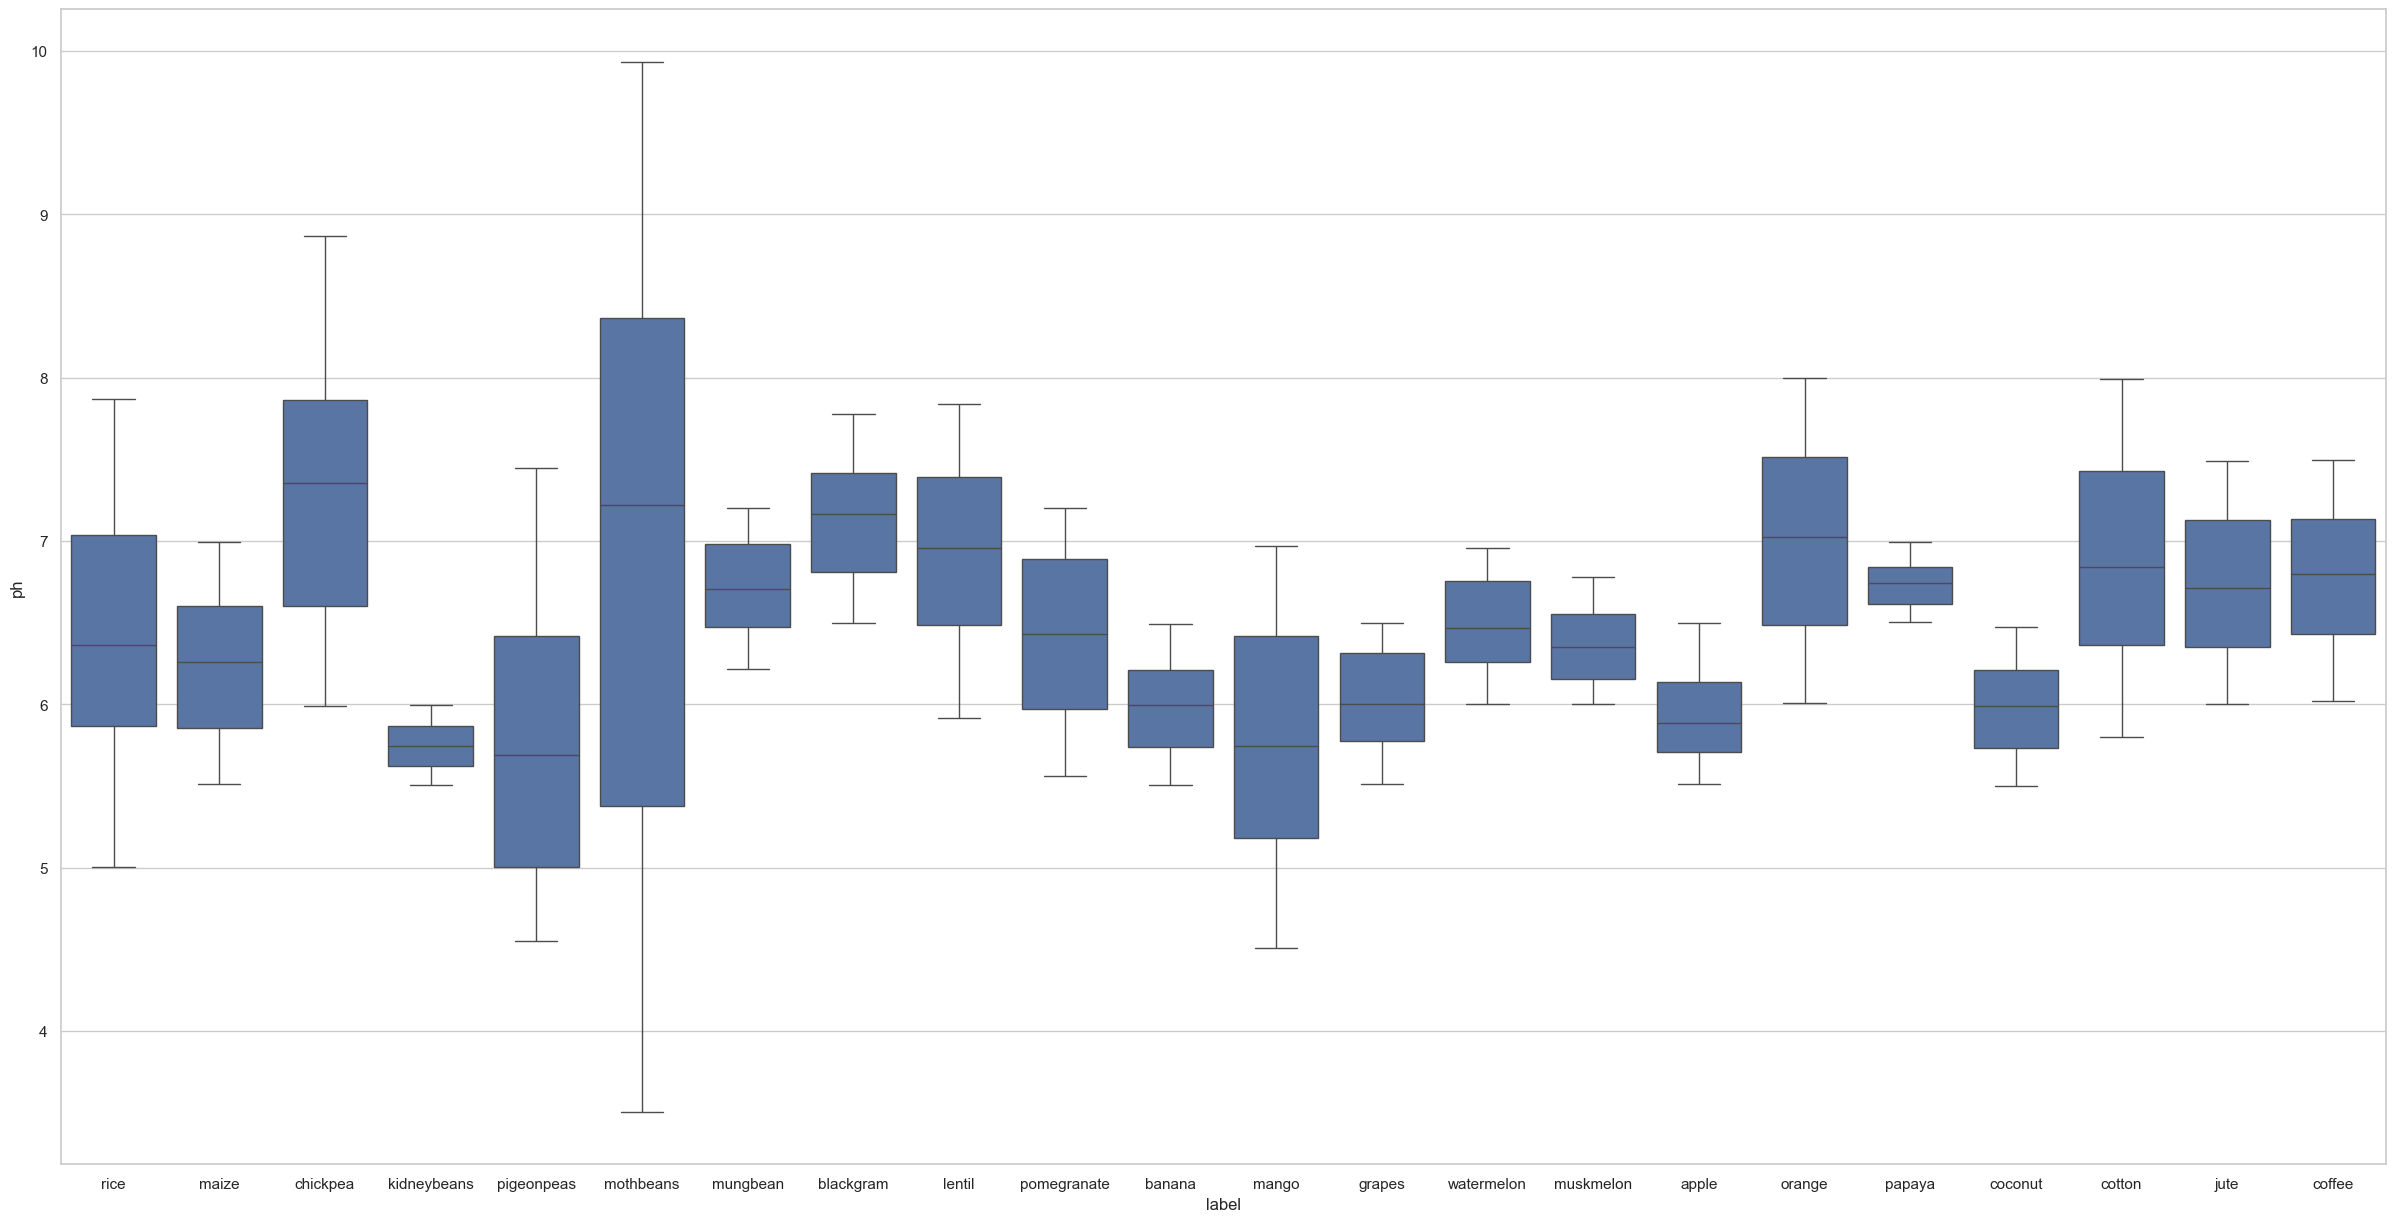

In [40]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='ph',data=Data)
plt.savefig("./figures/boxplot_outliers.png", dpi= 100)

In [11]:
X, y = Data.iloc[:, :-1], Data.iloc[:, -1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
acc = []
model = []

# Support Victor Machine

In [14]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,y_train)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(sklearn.metrics.classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.9636363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.90      0.95      0.93        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.80      0.87      0.83        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.0

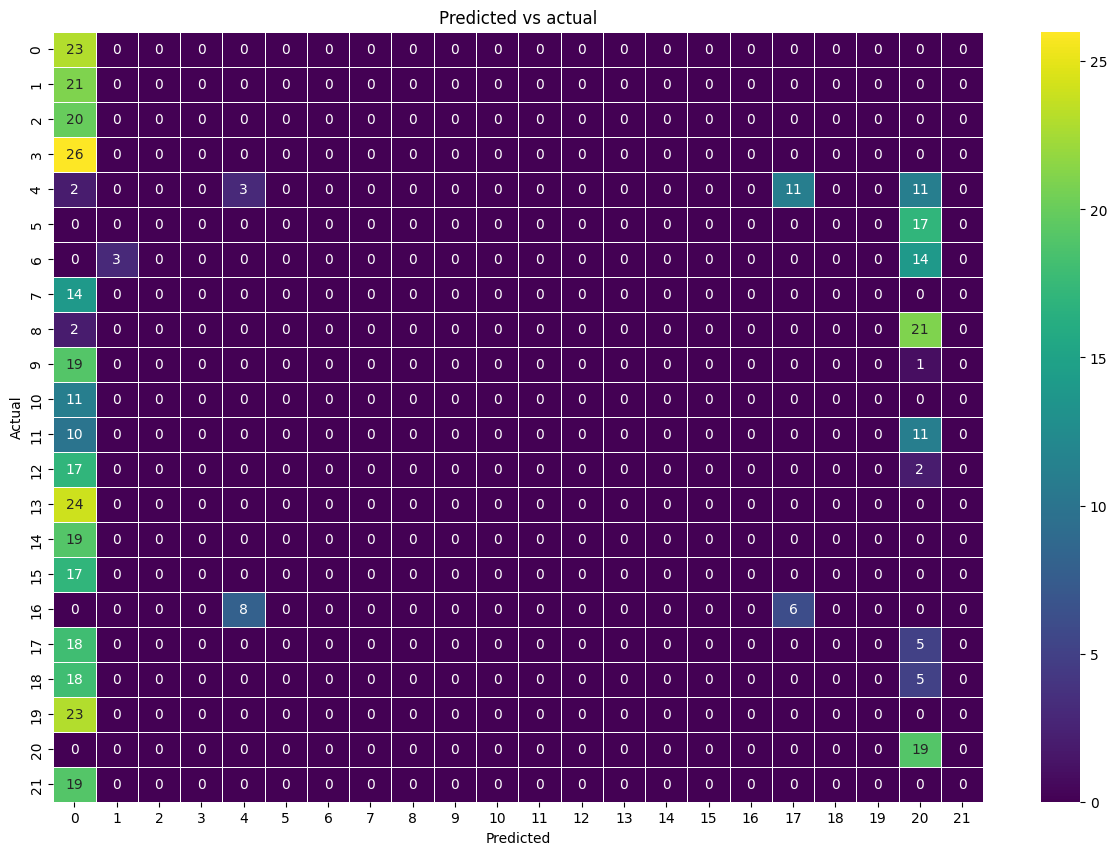

<Figure size 640x480 with 0 Axes>

In [15]:
y_pred = SVM.predict(X_test)
y_true = y_test

cm_SVM = metrics.confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_SVM, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()
plt.savefig("SVM_confusion_matrix.png", dpi=100)

In [16]:
score = sklearn.model_selection.cross_val_score(SVM,X,y,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

In [17]:
joblib.dump(SVM, "./Models/SVM_model.pkl")

['./Models/SVM_model.pkl']

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(metrics.classification_report(y_test,predicted_values))

RF's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00

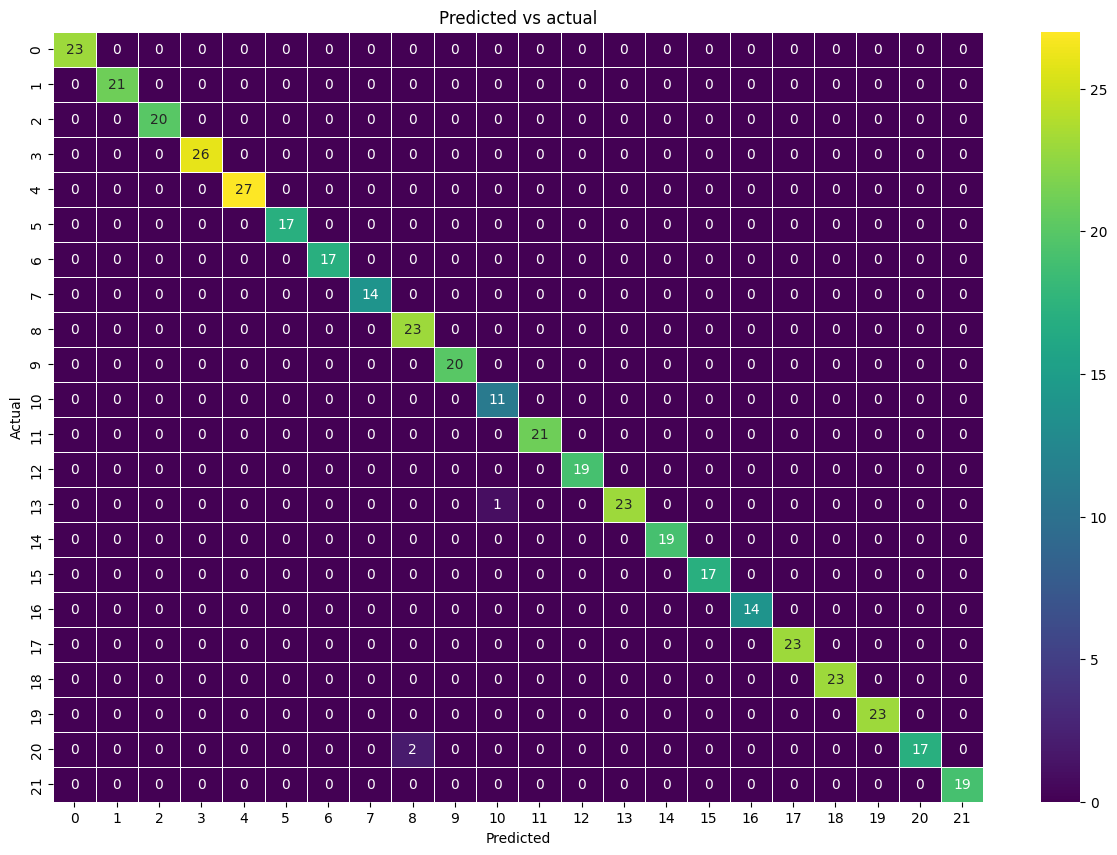

<Figure size 640x480 with 0 Axes>

In [29]:
y_pred = RF.predict(X_test)
y_true = y_test

cm_RF = metrics.confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_RF, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()
plt.savefig("./figures/RF_confusion_matrix.png")

In [20]:
score = sklearn.model_selection.cross_val_score(RF,X,y,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [21]:
joblib.dump(RF, "./Models/RF_model.pkl")

['./Models/RF_model.pkl']

# XGBoost

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

In [23]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train_encoded)

predicted_values = XB.predict(X_test)

x = metrics.accuracy_score(y_test_encoded, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(metrics.classification_report(y_test_encoded,predicted_values))

XGBoost's Accuracy is:  0.9863636363636363
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.96      0.96      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00     

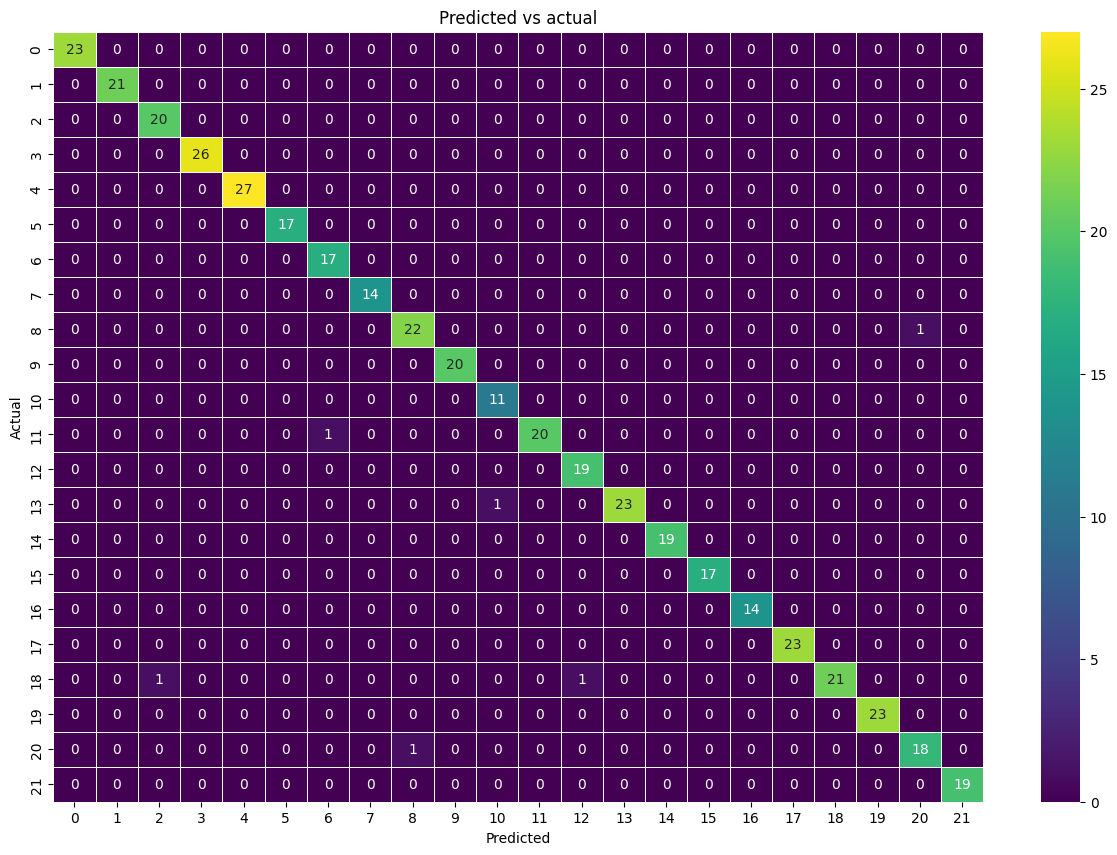

<Figure size 640x480 with 0 Axes>

In [24]:
y_pred = XB.predict(X_test)
y_true = y_test


cm_XB = metrics.confusion_matrix(y_test_encoded,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_XB, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()
plt.savefig("./figures/XGboost_confusion_matrix.png", dpi= 100)

In [25]:
y_encoded = le.transform(y)
score = sklearn.model_selection.cross_val_score(XB,X,y_encoded,cv=5)
score

array([0.99545455, 0.98863636, 0.99545455, 0.99545455, 0.98863636])

In [26]:
joblib.dump(XB, "./Models/XGBoost_model.pkl")

['./Models/XGBoost_model.pkl']

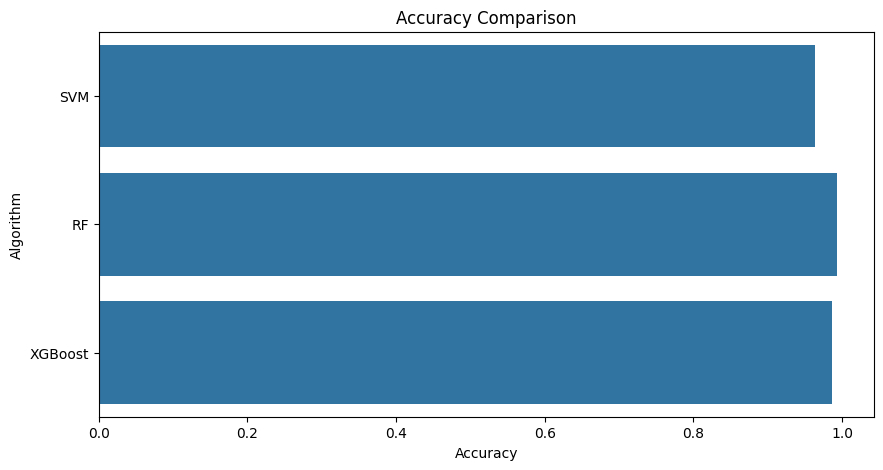

In [28]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model)
plt.savefig("./figures/models_compare.png", dpi=100)